In [64]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns   
#importing the needy libraries.

In [65]:
def importi():
    details =  pd.read_csv("Firstdetail.csv")
    details1 = pd.read_csv("lastdetails.csv")
    survived = pd.read_csv("survived.csv")
    return details, details1, survived  # deined a function with name importi() which is reading data from the "Firstdetail.csv", "lastdetails.csv",  "survived.csv" file and storing it in the 'survived' variable 

In [66]:
details, details1, survived = importi() # Calling the importi() function to obtain three dataframes: details, details1, and survived

In [67]:
details.head(4)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,C123,S


In [68]:
details.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,C123,S


In [69]:
details1.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr. James Corbat,male,34.0,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs. James Bett,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S


In [70]:
survived.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [71]:
details.fillna(0, inplace= True) #as i found out that there are empty records ("NAN") in the details dataframe so replaced them with '0'
details1.fillna(0, inplace= True) #replacing NAN with zero in dataframe 'details1'
details['Fare']= details['Fare'].astype(int) #i wanted all the fare in the integer type so typecasted it into int type
details1['Fare'] = details1['Fare'].astype(int) #did same for details1 Fare field


In [72]:
details['Age'] = details['Age'].astype(int) #type casted age field 
details1['Age'] = details1['Age'].astype(int)

seeing three dataset i found them somewhat uncomplete or missing values although their missing values were inanother dataframe so seeing this i  decided to merged all the colummns data and collect them into one dataframe that is 'data'.

In [73]:
# Merging two dataframes, 'details' and 'details1', based on the 'PassengerId' column using an outer join
# This creates a new dataframe named 'mergedf' containing combined information from both dataframes
mergedf = pd.merge(details, details1, on='PassengerId', how='outer')

# Merging the 'survived' dataframe with 'mergedf', based on the 'PassengerId' column using an outer join
# This creates a final dataframe named 'data' with comprehensive information on passengers and survival status
data = pd.merge(survived, mergedf, on='PassengerId', how='outer')

In [74]:
data.head()

,PassengerId,Survived_x,Survived_y,Pclass_x,Name_x,Sex_x,Age_x,SibSp_x,Parch_x,Ticket_x,...,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Mr. James Corbat,male,34.0,0.0,0.0,330911,7.0,0,Q
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Mrs. James Bett,female,47.0,1.0,0.0,363272,7.0,0,S
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mr. Thomas Francis,male,62.0,0.0,0.0,240276,9.0,0,Q
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Mr. Albert,male,27.0,0.0,0.0,315154,8.0,0,S
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Mrs. Alexander,female,22.0,1.0,1.0,3101298,12.0,0,S


Handling missing values

In [75]:
# Copying values from 'Sex_x' to 'Sex' and handling missing values
data['Sex'] = data['Sex_x']
nan_mask = data['Sex'].isna()
data.loc[nan_mask, 'Sex'] = data.loc[nan_mask, 'Sex_y']

# Copying values from 'Survived_x' to 'Survived' and handling missing values
data['Survived'] = data['Survived_x']
nan_mask = data['Survived_x'].isna()
data.loc[nan_mask, 'Survived_x'] = data.loc[nan_mask, 'Survived_y']

# Copying values from 'Fare_x' to 'Fare' and handling missing values
data['Fare'] = data['Fare_x']
nan_mask = data['Fare'].isna()
data.loc[nan_mask, 'Fare'] = data.loc[nan_mask, 'Fare_y']

# Copying values from 'Pclass_x' to 'Pclass' and handling missing values
data['Pclass'] = data['Pclass_x']
nan_mask = data['Pclass_x'].isna()
data.loc[nan_mask, 'Pclass'] = data.loc[nan_mask, 'Pclass_y']

# Copying values from 'Age_x' to 'Age' and handling missing values
data['Age'] = data['Age_x']
nan_mask = data['Age_x'].isna()
data.loc[nan_mask, 'Age'] = data.loc[nan_mask, 'Age_y']

# Copying values from 'Name_x' to 'Names' and handling missing values
data['Names'] = data['Name_x']
nan_mask = data['Name_x'].isna()
data.loc[nan_mask, 'Names'] = data.loc[nan_mask, 'Name_y']

# Copying values from 'Cabin_x' to 'Cabin' and handling missing values
data['Cabin'] = data['Cabin_x']
nan_mask = data['Cabin_x'].isna()
data.loc[nan_mask, 'Cabin'] = data.loc[nan_mask, 'Cabin_y']

# Copying values from 'Embarked_x' to 'Embarked' and handling missing values
data['Embarked'] = data['Embarked_x']
nan_mask = data['Embarked_x'].isna()
data.loc[nan_mask, 'Embarked'] = data.loc[nan_mask, 'Embarked_y']

# Copying values from 'Pclass_x' to 'PClass' and handling missing values
data['PClass'] = data['Pclass_x']
nan_mask = data['Pclass_x'].isna()
data.loc[nan_mask, 'PClass'] = data.loc[nan_mask, 'Pclass_y']


In [76]:
data.head()

,PassengerId,Survived_x,Survived_y,Pclass_x,Name_x,Sex_x,Age_x,SibSp_x,Parch_x,Ticket_x,...,Embarked_y,Sex,Survived,Fare,Pclass,Age,Names,Cabin,Embarked,PClass
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q,male,0.0,7.0,3.0,34.0,Mr. James Corbat,0,Q,3.0
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,S,female,1.0,7.0,3.0,47.0,Mrs. James Bett,0,S,3.0
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q,male,0.0,9.0,2.0,62.0,Mr. Thomas Francis,0,Q,2.0
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,S,male,0.0,8.0,3.0,27.0,Mr. Albert,0,S,3.0
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,S,female,1.0,12.0,3.0,22.0,Mrs. Alexander,0,S,3.0


In [77]:
COLUMNS2D = ['Survived_x',  'Survived_y' , 'Pclass_x', 'Name_x', 'Sex_x', 'Age_x', 'Ticket_x', 'Fare_x', 'Cabin_y', 'Cabin_x', 'Embarked_y', 'Embarked_x','Ticket_x', 'Ticket_y']

Cleaning the extra and non important data by droping columns that are not being in used for analysis 

In [78]:
data = data.drop(columns = COLUMNS2D, axis = 1) #deleting the columns

In [79]:
data

,PassengerId,SibSp_x,Parch_x,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Fare_y,Sex,Survived,Fare,Pclass,Age,Names,Cabin,Embarked,PClass
0,892,NaN,NaN,3.0,Mr. James Corbat,male,34.0,0.0,0.0,7.0,male,0.0,7.0,3.0,34.0,Mr. James Corbat,0,Q,3.0
1,893,NaN,NaN,3.0,Mrs. James Bett,female,47.0,1.0,0.0,7.0,female,1.0,7.0,3.0,47.0,Mrs. James Bett,0,S,3.0
2,894,NaN,NaN,2.0,Mr. Thomas Francis,male,62.0,0.0,0.0,9.0,male,0.0,9.0,2.0,62.0,Mr. Thomas Francis,0,Q,2.0
3,895,NaN,NaN,3.0,Mr. Albert,male,27.0,0.0,0.0,8.0,male,0.0,8.0,3.0,27.0,Mr. Albert,0,S,3.0
4,896,NaN,NaN,3.0,Mrs. Alexander,female,22.0,1.0,1.0,12.0,female,1.0,12.0,3.0,22.0,Mrs. Alexander,0,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,887,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,13.0,2.0,27.0,Rev. Juozas,0,S,2.0
1303,888,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,30.0,1.0,19.0,Miss. Margaret Edith,B42,S,1.0
1304,889,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,23.0,3.0,0.0,"Miss. Catherine Helen ""Carrie""",0,S,3.0
1305,890,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,30.0,1.0,26.0,Mr. Karl Howell,C148,C,1.0


In [80]:
COLUMNS = ['SibSp_x', 'Parch_x',  	'Pclass_y'	,'Name_y',	'Sex_y','Age_y','SibSp_y','Parch_y','Fare_y']

In [81]:
data = data.drop(columns = COLUMNS, axis = 1) #droping another extra columns from the dataframe data

In [82]:
data.head(3)

,PassengerId,Sex,Survived,Fare,Pclass,Age,Names,Cabin,Embarked,PClass
0,892,male,0.0,7.0,3.0,34.0,Mr. James Corbat,0,Q,3.0
1,893,female,1.0,7.0,3.0,47.0,Mrs. James Bett,0,S,3.0
2,894,male,0.0,9.0,2.0,62.0,Mr. Thomas Francis,0,Q,2.0


while integrating some data fields type has changed now for that reason i have to type cast the data field into desired type

In [83]:
data['Age'] = data['Age'].astype(int)
data['Pclass'] = data['Pclass'].astype(int)
data['Fare'] = data['Fare'].astype(int)

In [84]:
columnss = ['PClass']

In [85]:
data =data.drop(columns = columnss,axis =1)

In [86]:
data.head(4)

,PassengerId,Sex,Survived,Fare,Pclass,Age,Names,Cabin,Embarked
0,892,male,0.0,7,3,34,Mr. James Corbat,0,Q
1,893,female,1.0,7,3,47,Mrs. James Bett,0,S
2,894,male,0.0,9,2,62,Mr. Thomas Francis,0,Q
3,895,male,0.0,8,3,27,Mr. Albert,0,S


In [87]:
data.dropna(inplace = True)

In [88]:
 data['Survived'] = data['Survived'].astype(int)

In [89]:
data = data[data['Age'] != 0] # i dont want the age of the person who have by mistakenly came with the age 0, selected those who has age more than 0.

In [90]:
data.head(10)

,PassengerId,Sex,Survived,Fare,Pclass,Age,Names,Cabin,Embarked
0,892,male,0,7,3,34,Mr. James Corbat,0,Q
1,893,female,1,7,3,47,Mrs. James Bett,0,S
2,894,male,0,9,2,62,Mr. Thomas Francis,0,Q
3,895,male,0,8,3,27,Mr. Albert,0,S
4,896,female,1,12,3,22,Mrs. Alexander,0,S
5,897,male,0,9,3,14,Mr. Johan Cervin,0,S
6,898,female,1,7,3,30,Miss. Kate,0,Q
7,899,male,0,29,2,26,Mr. Albert Francis,0,S
8,900,female,1,7,3,18,Mrs. Joseph,0,C
9,901,male,0,24,3,21,Mr. John Samuel,0,S


Text(0, 0.5, 'Survival Rate')

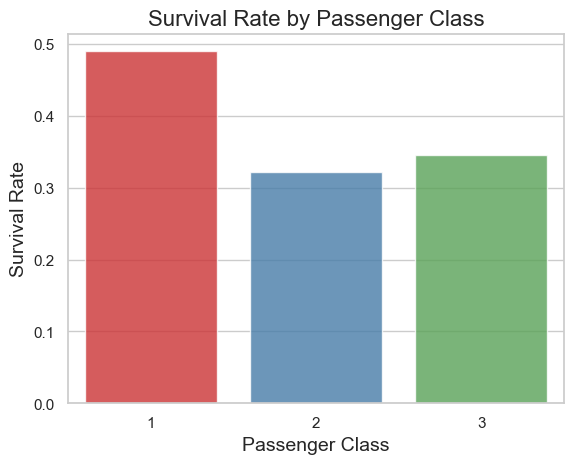

In [91]:
sns.set_palette("Set1")

# Create the bar plot with adjustments
sns.barplot(x='Pclass', y='Survived', data=data, alpha=0.8, errorbar=None)
sns.set(style='whitegrid')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

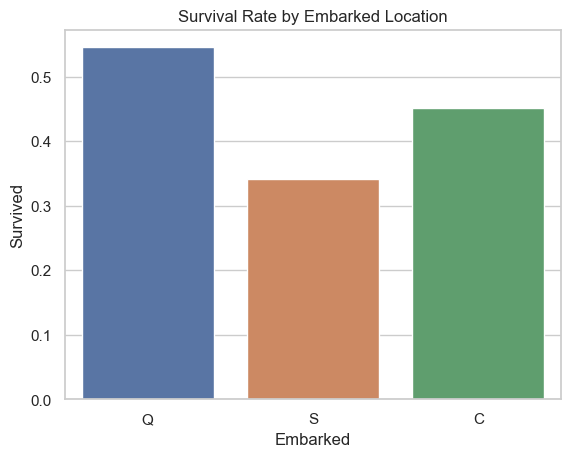

In [92]:
sns.barplot(x='Embarked', y='Survived', data=data, errorbar =None)
plt.title('Survival Rate by Embarked Location')
plt.show()

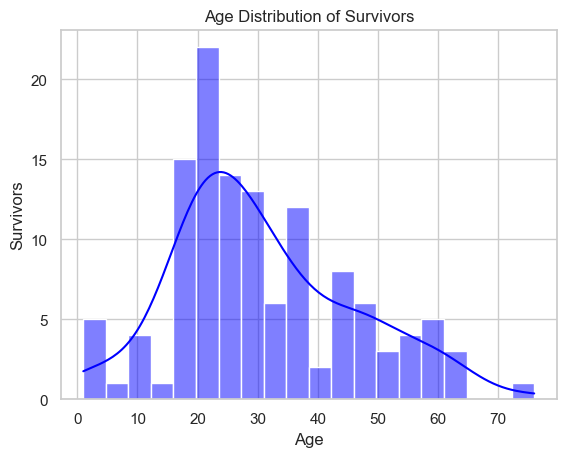

In [93]:
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Survivors')
plt.show()

In [94]:
fig = px.histogram(data[data['Survived'] == 1], x='Age', nbins=20, color_discrete_sequence=['Orange'], title='Age Distribution of Survivors', labels={'Age': 'Age', 'count': 'Survivors'})
fig.update_layout(width=800, height=500)
